<a href="https://colab.research.google.com/github/XGHouFTW/py-cryptopredict/blob/main/LSTM_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).
                   Date  BTC-ChangeFactor  ETH-ChangeFactor  \
0    2020-01-31 0:00:00          0.983406          0.975226   
1    2020-02-01 0:00:00          1.004977          1.019766   
2    2020-02-02 0:00:00          0.995159          1.027706   
3    2020-02-03 0:00:00          0.994525          1.006668   
4    2020-02-04 0:00:00          0.987961          0.996781   
..                  ...               ...               ...   
727  2022-01-27 0:00:00          1.008044          0.982090   
728  2022-01-28 0:00:00          1.017665          1.051802   
729  2022-01-29 0:00:00          1.009462          1.019828   
730  2022-01-30 0:00:00          0.993858          1.001886   
731  2022-01-31 0:00:00          1.014843          1.032657   

     DOGE-ChangeFactor  BTC-Open-EMA7  BTC-High-EMA7  BTC-Low-EMA7  \
0             0.981148    9508.313477   

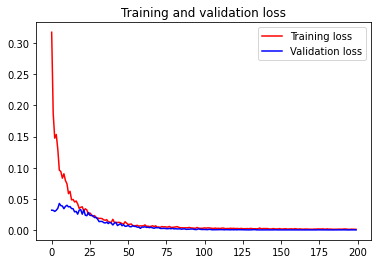

<Figure size 432x288 with 0 Axes>

(572,) (144,)
Train data RMSE:  0.039189268568668736
Train data MSE:  0.0015357987709472473
Train data MAE:  0.02123285538623697
-------------------------------------------------------------------------------------
Test data RMSE:  0.013228448225789315
Test data MSE:  0.00017499184246238847
Test data MAE:  0.01012220124099659
Train data R2 score: -5.577054347422748
Test data R2 score: -0.04299421803482972
Train data MGD:  0.0018522625497210934
Test data MGD:  0.0001753884802104471
----------------------------------------------------------------------
Train data MPD:  0.001682720436506251
Test data MPD:  0.0001751814203976098
(716, 15, 191) (716,)
Epoch 1/200
18/18 [==============================] - 4s 74ms/step - loss: 1.3664 - accuracy: 0.0000e+00 - val_loss: 0.7660 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 1s 54ms/step - loss: 0.6590 - accuracy: 0.0000e+00 - val_loss: 0.3161 - val_accuracy: 0.0000e+00
Epoch 3/200
18/18 [==========================

In [ ]:
# -*- coding: utf-8 -*-
"""LSTMPredictor.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1snuaWc20AeWGvnrBaj0MKyRIcmX3l6jS
"""

# !pip install ipdb
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import pickle

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Mount Google Drive
from google.colab import drive
drive.mount('/content/MyDrive')

def main(filepath: str, filename: str, prediction_columns: list, time_step: int = 10, num_units: int = 128, batch_size: int = 32):

    maindf = pd.read_csv(filename)

    describe_dataframe(maindf)

    maindf = preprocess_dataset(maindf)

    # convert an array of values into a dataset matrix


    """
    columns = ['index', 'Date', 'BTC_Open', 'BTC_Close', 'BTC_Volume', 'BTC_change_factor', 
    'ETH_Open', 'ETH_Close', 'ETH_Volume', 'ETH_change_factor', 'DOGE_Open', 'DOGE_Close',
    'DOGE_Volume', 'DOGE_change_factor', 'btc_newsPosScoreaverage', 'btc_newsNegScoreaverage',
    'btc_newsComScoreaverage', 'btc_newsScorecount', 'eth_newsPosScoreaverage', 
    'eth_newsNegScoreaverage', 'eth_newsComScoreaverage', 'eth_newsScorecount', 
    'doge_newsPosScoreaverage', 'doge_newsNegScoreaverage', 'doge_newsComScoreaverage', 
    'doge_newsScorecount', 'cryptocurrency_newsPosScoreaverage', 'cryptocurrency_newsNegScoreaverage', 
    'cryptocurrency_newsComScoreaverage', 'cryptocurrency_newsScorecount', 'economy_newsPosScoreaverage', 
    'economy_newsNegScoreaverage', 'economy_newsComScoreaverage', 'economy_newsScorecount',
    'finance_newsPosScoreaverage', 'finance_newsNegScoreaverage', 'finance_newsComScoreaverage', 
    'finance_newsScorecount', 'politics_newsPosScoreaverage', 'politics_newsNegScoreaverage', 
    'politics_newsComScoreaverage', 'politics_newsScorecount', 'pandemic_newsPosScoreaverage', 
    'pandemic_newsNegScoreaverage', 'pandemic_newsComScoreaverage', 'pandemic_newsScorecount', 
    'btc_redditPosScoreaverage', 'btc_redditNegScoreaverage', 'btc_redditComScoreaverage', 
    'btc_redditScorecount', 'eth_redditPosScoreaverage', 'eth_redditNegScoreaverage', 
    'eth_redditComScoreaverage', 'eth_redditScorecount', 'doge_redditPosScoreaverage', 
    'doge_redditNegScoreaverage', 'doge_redditComScoreaverage', 'doge_redditScorecount', 
    'cryptocurrency_redditPosScoreaverage', 'cryptocurrency_redditNegScoreaverage', 
    'cryptocurrency_redditComScoreaverage', 'cryptocurrency_redditScorecount', 
    'economy_redditPosScoreaverage', 'economy_redditNegScoreaverage', 
    'economy_redditComScoreaverage', 'economy_redditScorecount', 'finance_redditPosScoreaverage', 
    'finance_redditNegScoreaverage', 'finance_redditComScoreaverage', 'finance_redditScorecount', 
    'politics_redditPosScoreaverage', 'politics_redditNegScoreaverage', 'politics_redditComScoreaverage', 
    'politics_redditScorecount', 'pandemic_redditPosScoreaverage', 'pandemic_redditNegScoreaverage', 
    'pandemic_redditComScoreaverage', 'pandemic_redditScorecount']
    """
    columns = list(maindf.columns)[1:]

    for prediction_column in prediction_columns:
        X, y = create_dataset(maindf, columns, prediction_column, time_step)
        print(np.shape(X), np.shape(y))
        X_train, X_test, y_train, y_test = traintest_split(X, y)

        input_shape = (None, len(X[0][0]))

        # model.add(LSTM(128, "relu", dropout=.2, recurrent_dropout=0.2, input_shape=(None, len(X_train[0][0])))
        # model.add(LSTM(time_step, input_dim=len(X_train[0][0]), activation="relu"))

        """
        units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
        bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
        recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
        dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, 
        go_backwards=False, stateful=False,
        """

        model = Sequential()
        model.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=input_shape))
        model.add(Dense(1))

        model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=batch_size,
                              verbose=1)
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(len(loss))

        plt.plot(epochs, loss, 'r', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend(loc=0)
        plt.figure()

        plt.show()

        pad = np.zeros(time_step)

        train_predict1 = model.predict(X_train).reshape(len(X_train))
        test_predict1 = model.predict(X_test).reshape(len(X_test))
        print(train_predict1.shape, test_predict1.shape)
        pred = np.concatenate((pad, train_predict1, test_predict1), axis=None)
        maindf[prediction_column+"-prediction"] = pd.DataFrame(pred) 

        maindf.to_csv(filename, index = False)
        
        # Evaluation metrices RMSE and MAE
        print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train, train_predict1)))
        print("Train data MSE: ", mean_squared_error(y_train, train_predict1))
        print("Train data MAE: ", mean_absolute_error(y_train, train_predict1))
        print("-------------------------------------------------------------------------------------")
        print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test, test_predict1)))
        print("Test data MSE: ", mean_squared_error(y_test, test_predict1))
        print("Test data MAE: ", mean_absolute_error(y_test, test_predict1))

        """- ## Variance Regression Score"""
        # print("Train data explained variance regression score:",
              # explained_variance_score(y, pred[20:]))

        """- ## R square score for regression"""

        print("Train data R2 score:", r2_score(y_train, train_predict1))
        print("Test data R2 score:", r2_score(y_test, test_predict1))

        """- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)"""

        print("Train data MGD: ", mean_gamma_deviance(y_train, train_predict1))
        print("Test data MGD: ", mean_gamma_deviance(y_test, test_predict1))
        print("----------------------------------------------------------------------")
        print("Train data MPD: ", mean_poisson_deviance(y_train, train_predict1))
        print("Test data MPD: ", mean_poisson_deviance(y_test, test_predict1))


    return True
def traintest_split(X: np.array, y: np.array, split: float = 0.8):
    train_size = int(split*len(X))
    X_train = X[:train_size]
    X_test = X[train_size:]

    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test

def deprecated(maindf: pd.DataFrame):
    pass
    """
    plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
    plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
    plt.title('Bitcoin Actual vs. predicted prices')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

    print(maindf)

    maindf.dropna(subset=['BTC_pred', 'ETH_pred', 'DOGE_pred'])

    maindf.to_csv("MPD.csv", index=False)

    - # Model Evaluation"""

    # Transform back to original form

    """train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
    original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))"""

    """- ## Evaluation metrices RMSE, MSE and MAE"""

    """print("Test data explained variance regression score:", 
          explained_variance_score(, t))"""



    """- # Comparision of original stock close price and predicted close price"""

    """# shift train predictions for plotting

    look_back = time_step
    trainPredictPlot = np.empty_like(closedf)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
    print("Train predicted data: ", trainPredictPlot.shape)

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(closedf)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(closedf) - 1, :] = test_predict
    print("Test predicted data: ", testPredictPlot.shape)

    names = cycle(['Original close price', 'Train predicted close price', 'Test predicted close price'])

    plotdf = pd.DataFrame({'date': close_stock['Date'],
                           'original_close': close_stock['BTC_Close'],
                           'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
                           'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()})

    fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'], plotdf['train_predicted_close'],
                                               plotdf['test_predicted_close']],
                  labels={'value': 'Stock price', 'date': 'Date'})
    fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.for_each_trace(lambda t: t.update(name=next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    """
    """- # Predicting next 30 days"""

    """    x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
    temp_input = list(x_input)
    temp_input = temp_input[0].tolist()

    from numpy import array

    lst_output = []
    n_steps = time_step
    i = 0
    pred_days = 30
    while (i < pred_days):

        if (len(temp_input) > time_step):

            x_input = np.array(temp_input[1:])
            # print("{} day input {}".format(i,x_input))
            x_input = x_input.reshape(1, -1)
            x_input = x_input.reshape((1, n_steps, 1))

            yhat = model.predict(x_input, verbose=0)
            # print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            # print(temp_input)

            lst_output.extend(yhat.tolist())
            i = i + 1

        else:

            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())

            lst_output.extend(yhat.tolist())
            i = i + 1

    print("Output of predicted next days: ", len(lst_output))
    """
    """- # Plotting last 15 days of dataset and next predicted 30 days"""

    """    last_days = np.arange(1, time_step + 1)
    day_pred = np.arange(time_step + 1, time_step + pred_days + 1)
    print(last_days)
    print(day_pred)

    temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
    temp_mat[:] = np.nan
    temp_mat = temp_mat.reshape(1, -1).tolist()[0]

    last_original_days_value = temp_mat
    next_predicted_days_value = temp_mat

    last_original_days_value[0:time_step + 1] = \
    scaler.inverse_transform(closedf[len(closedf) - time_step:]).reshape(1, -1).tolist()[0]
    next_predicted_days_value[time_step + 1:] = \
    scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

    new_pred_plot = pd.DataFrame({
        'last_original_days_value': last_original_days_value,
        'next_predicted_days_value': next_predicted_days_value
    })

    names = cycle(['Last 15 days close price', 'Predicted next 30 days close price'])

    fig = px.line(new_pred_plot, x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                           new_pred_plot['next_predicted_days_value']],
                  labels={'value': 'Stock price', 'index': 'Timestamp'})
    fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')

    fig.for_each_trace(lambda t: t.update(name=next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    """
    # Plotting entire Closing Stock Price with next 30 days period of prediction"""
    """
    lstmdf = closedf.tolist()
    lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())
    lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

    names = cycle(['Close price'])

    fig = px.line(lstmdf, labels={'value': 'Stock price', 'index': 'Timestamp'})
    fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')

    fig.for_each_trace(lambda t: t.update(name=next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    """
    """Thats it we are Done with Bitcoin Price Prediction using LSTM."""

def preprocess_dataset(df):
    df.replace(to_replace=np.nan, value=0.0, inplace=True)
    print(df.shape)
    # normalize_dataset(df)
    return df

def create_dataset(dataset: pd.DataFrame, columns_X: list, column_Y: str, time_step=1):

    # create x and y datasets, to be passed into model
    # 
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        # The daily subset ranges from the index up until index + timestep -1
          # Becaus
        daily_subset = dataset.loc[i:(i + time_step - 1), columns_X]
        dataX.append(daily_subset)
        dataY.append(dataset.loc[i + time_step, column_Y])
    return np.array(dataX), np.array(dataY)

def normalize_dataset(data: pd.DataFrame):
    columns = list(data.columns)
    for column in columns[1:]:
        data[column] = normalize_column(data[column])

def normalize_column(column: pd.Series) -> pd.Series:
    STD = np.std(column)
    mean = np.mean(column)
    column = column.apply(lambda x: (x - mean) / STD)
    return column

def describe_dataframe(df: pd.DataFrame):
    print(df)

    print('Total number of days present in the dataset: ', df.shape[0])
    print('Total number of fields present in the dataset: ', df.shape[1])

    print(df.shape,

    df.head(),

    df.tail(),

    df.info(),

    df.describe(),

    df.columns)

    print('\n\n\nNull Values:', df.isnull().values.sum())

    print('\n\n\nNA values:', df.isnull().values.any(), "\n\n\n")

if __name__=="__main__":

    # script, filepath, currencies = sys.argv
    # currencies = currencies.split()
    filename = '/content/MyDrive/MyDrive/ISEF/Datasets/MergedPriceDataEMA7.csv'
    filepath = '/content/MyDrive/MyDrive/ISEF/Datasets'
    # drive.mount('/content/MyDrive')

    # filepath = './'
    # filename = './MergedPriceDataEMA.csv'
    prediction_columns = [
        'BTC-ChangeFactor-EMA7',
        'ETH-ChangeFactor-EMA7',
        'DOGE-ChangeFactor-EMA7',
        'BTC-ChangeFactor',
        'ETH-ChangeFactor',
        'DOGE-ChangeFactor'
    ]

    main(filepath, filename, prediction_columns, time_step = 15)

In [ ]:
a = [1, 2, 3, 4, 5]
a[1:3]